In [1]:

import subprocess
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
collision_number = 10000;
delta_t = 0.1
particle_number = 20
m = list(map(str, [1, 1, 1]))
x = list(map(str, [1, 4, 7]))
v = list(map(str, [1, 1, 1]))

d = {
    "collision_number": str(collision_number),
    "delta_t": str(delta_t),
    "particle_number": str(particle_number),
    "m": m,
    "x": x,
    "v": v,
}
with open('input.json', 'w') as outfile:
    json.dump(d, outfile)

In [3]:
!g++ --std=c++20  main.cpp -o main
subprocess.call(["./main", "input.json"])
data = np.loadtxt("test.txt")

10000	0.1	20

[9.81786831 9.81786831 9.81786831 ... 9.81787751 9.81787751 9.81787005]


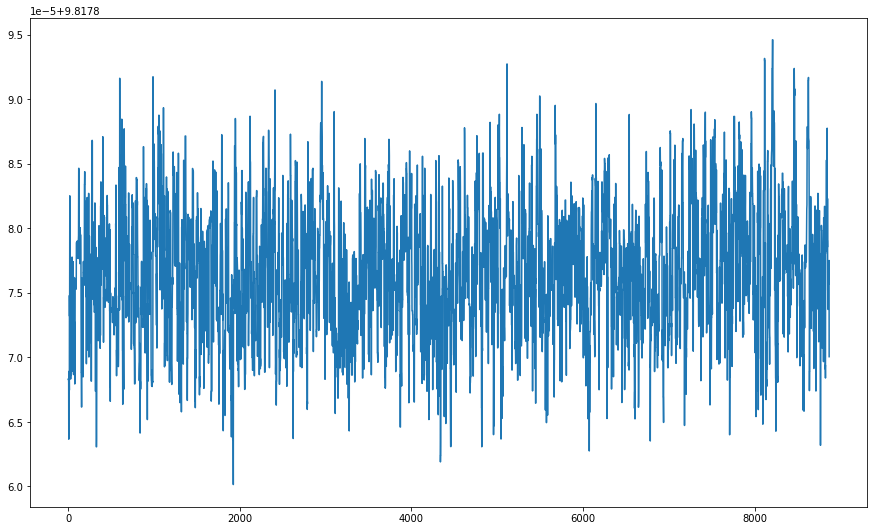

In [4]:

ans = data[:, particle_number * 2:].sum(axis=1)

fig, ax = plt.subplots(1, 1, figsize=(15, 9))

print(ans)
ax.plot(np.arange(len(ans)), ans)

<IPython.core.display.Javascript object>


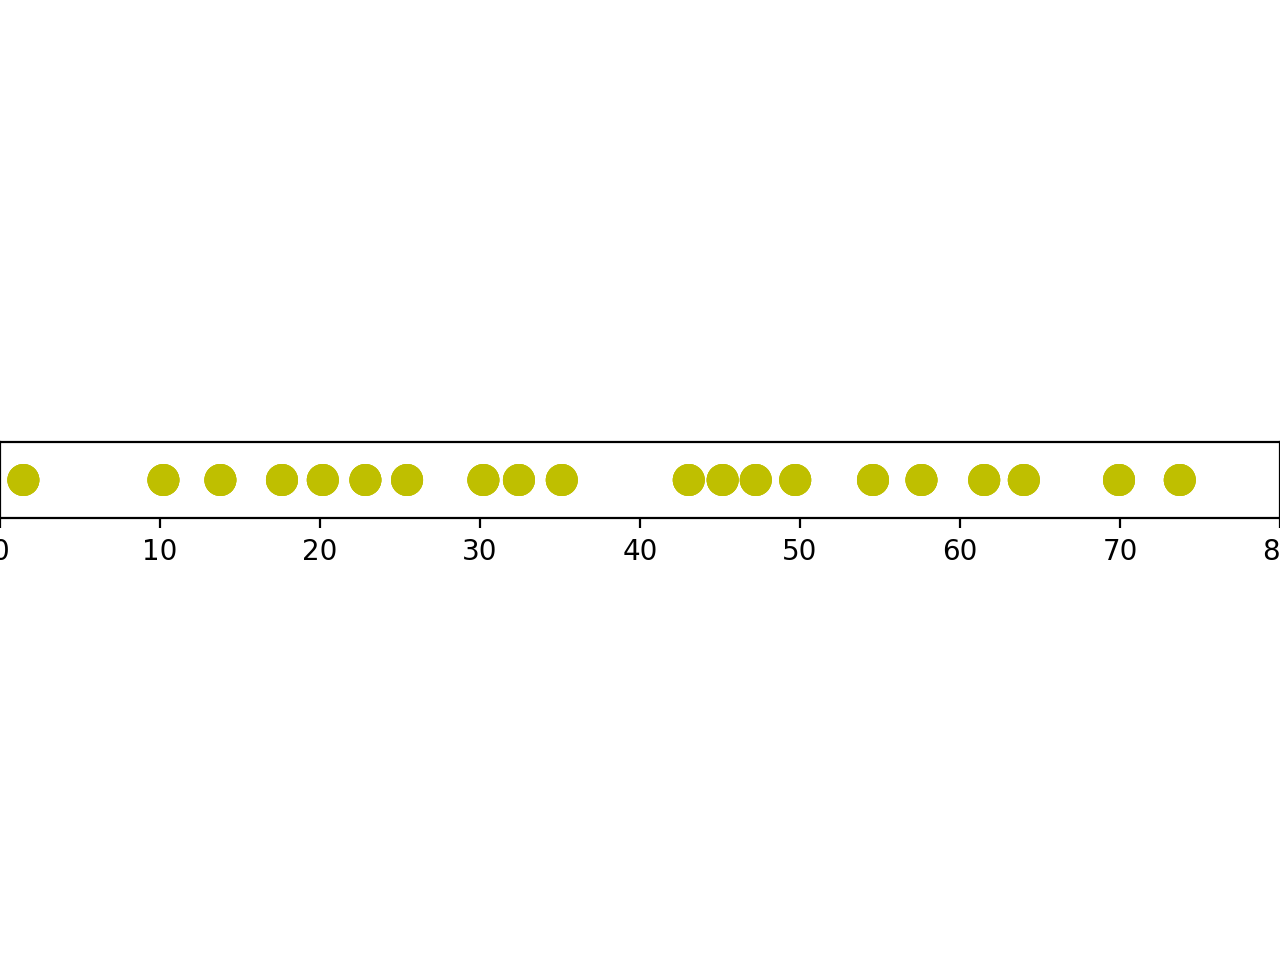

In [5]:
%matplotlib notebook
from matplotlib import animation

fig = plt.figure()
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(0, 80), ylim=(-2.4, 2.4))
ball_num = particle_number
patches = []
for i in range(ball_num):
    patches.append(plt.Circle((0, 0), 1, fc='y'))
# patch = plt.Circle((0, 0), 1, fc='y')
# patch_1 = plt.Circle((0, 0), 1, fc='y')

def init():
    """initialize animation"""
    for i in range(ball_num):
        patches[i].center = (0, 0)
        ax.add_patch(patches[i])
#     patch.center = (0, 0)
#     patch_1.center = (0, 0)
#     ax.add_patch(patch)
#     ax.add_patch(patch_1)
    return tuple(patches)

def animate(i):
    """perform animation step"""
    for j in range(ball_num):
        patches[j].center = (data[i][j], 0)
#     patches[0].center = (data[i][0], 0)
#     patchea[1].center = (data[i][1], 0)
    return tuple(patches)

ani = animation.FuncAnimation(fig, animate, frames=5000,
                              interval=50, blit=True, init_func=init, repeat=True)

writervideo = animation.FFMpegWriter(fps=60)
ani.save('Gas.mp4', writer=writervideo)

plt.show()